# Exponential Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
tire = pd.read_excel('Tire_useability.xlsx')
tire.head()

,Miles_driven,Percentage_Useable
0,1,98.2
1,2,91.7
2,5,81.3
3,10,64.0
4,20,36.4


Text(0, 0.5, 'Percentage Useable')

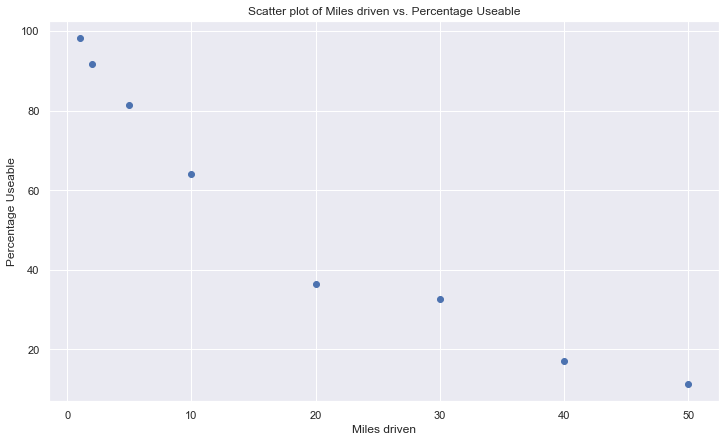

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable", data = tire)
plt.title("Scatter plot of Miles driven vs. Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")

The above scatter plot suggests an exponential relationship between miles driven and the percentage usability of the tire.

The exponential regression model to predict the percentage usability of the tire based on the miles driven can be represented as

$$ Percentage-Useable   = \beta_0e^{\beta_{1}(Miles-driven)}  $$

Taking the log of both sides the above equation can be written as 

$$ log(Percentage-Useable) = log(\beta_0) + \beta_1(Miles-driven) $$

we can thus fit a simple linear regression model to predict the percentage usability of the tire based on the miles driven, where the dependent (target) variable is log(Percentage_Useable)  and the independent (predictor) variable is Miles_driven.

The scatter between log(Percentage_Useable) and Miles_driven (as shown below) further suggest that a simple linear regression model can be used predict the percentage usability of the tire based on the miles driven, where the dependent (target) variable is log(Percentage_Useable)  and the predictor variable is Miles_driven.



In [11]:
tire["log_percentage_useable"] = np.log(tire["Percentage_Useable"])

In [12]:
tire

,Miles_driven,Percentage_Useable,log_percentage_useable
0,1,98.2,4.587006
1,2,91.7,4.518522
2,5,81.3,4.398146
3,10,64.0,4.158883
4,20,36.4,3.594569
5,30,32.6,3.484312
6,40,17.1,2.839078
7,50,11.3,2.424803


Text(0, 0.5, 'Log of Percentage Useable')

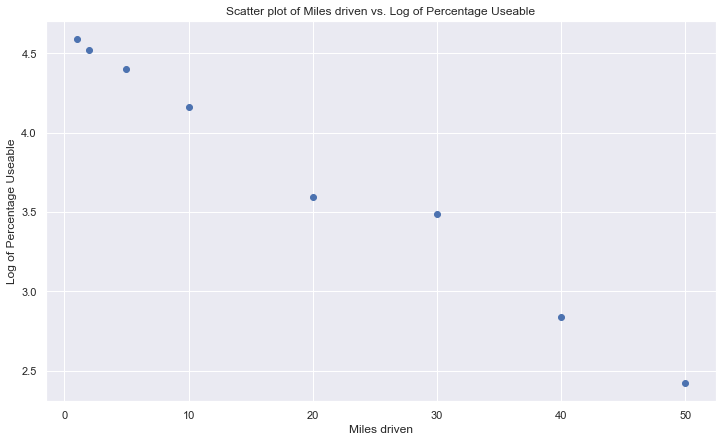

In [14]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y="log_percentage_useable",data = tire)
plt.title("Scatter plot of Miles driven vs. Log of Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")

### Determining an Exponential Regression Model

The exponential regression model to predict the percentage usability of the tire based on miles driven can be determined in R as shown below.

In [16]:
import statsmodels.formula.api as smf
exp_model = smf.ols(formula='log_percentage_useable ~ Miles_driven ', data = tire).fit()

The summary of the obtained regression model (as shown below) suggests that the model is useful since approximately 98.8% variability in the dependent (target) variable (i.e. Percentage_useable) can be explained by the variability in predictor variable (i.e. Miles_driven) as is indicated by the $R^2$.

Also the regression coefficients of the model are significant since the p-value is less than the significance level of 0.05.

In [17]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_percentage_useable   R-squared:                       0.988
Model:                                OLS   Adj. R-squared:                  0.986
Method:                     Least Squares   F-statistic:                     492.0
Date:                    Tue, 14 Apr 2020   Prob (F-statistic):           5.49e-07
Time:                            21:52:10   Log-Likelihood:                 8.5732
No. Observations:                       8   AIC:                            -13.15
Df Residuals:                           6   BIC:                            -12.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6046      0.051     89.850      0.000       4.479       4.730
Miles_driven    -0.0432      0.002    -22.182      0.000      -0.048      -0.038
==============================================================================
Omnibus:                        3.910   Durbin-Watson:                   3.060
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                0.581
Skew:                           0.533   Prob(JB):                        0.748
Kurtosis:                       3.779   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model can therefore be represented as 

$$log(Percentage_Useable) = 4.6046 - 0.0432 (Miles_driven)$$

Where $log(\beta_0)$ =  4.6046, i.e. $\beta_0$ = e4.6046 = 99.9429

i.e Percentage_Useable = 99.9429 $e^{-0.0432 (Miles-driven)}$

### Visualizing the Obtained Exponential Regression Model

The obtained regression model can be visualized as below

In [19]:
predictions = exp_model.predict(tire[["Miles_driven"]])


Text(0, 0.5, 'Log of Percentage Useable')

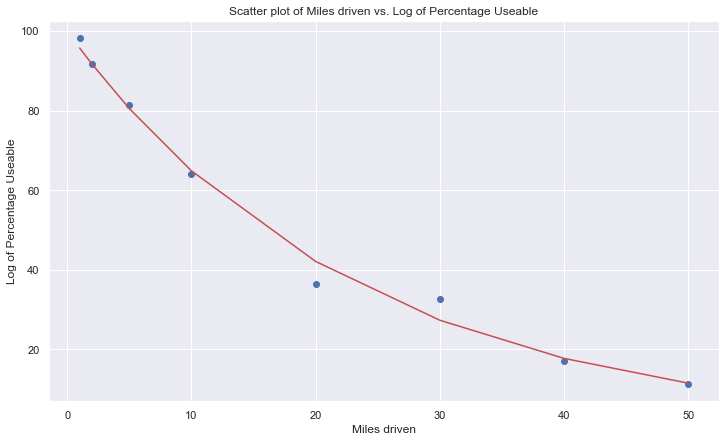

In [20]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable",data = tire)
plt.plot(tire["Miles_driven"],np.exp(predictions),'r')
plt.title("Scatter plot of Miles driven vs. Log of Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")

***

# Generalized Linear Model

## Introduction

Recall that for linear regression model described as discussed earlier in this course, it is assumed that the predictor variables are independent of each other.

$$ Y = \beta_0 + \beta_1x_1 +  . . .  + \beta_nx_n + \epsilon $$

Further, the dependent variable Y is assumed to be continuous and normally distributed. It is also assumed that the errors are normally distributed with a constant variance.

The linear regression model (as described above) implies that a constant change in a predictor leads to a constant change in the dependent variable. This is possible when the dependent variable has a normal distribution.

However, not all relationships can be modeled using the above linear regression model because:

1. __The target (dependent) variable may not be normally distributed__

The dependent variable may have a non-continuous distribution. For example if the target (dependent) variable is categorical in nature it can take only one distinct value/category. As a result it would tend to have multinomial distribution. Similarly if the dependent variable can take only discrete values (example. Count of children in a family) then it would tend to follow a Poisson distribution.  

2. __The relationship between the predictors (independent) and the target (dependent) variable__

The linear regression model (mentioned above) might be inadequate to cater to relationships where the effect of predictors on the dependent variables is non-linear in nature. For example: the growth rate of micro-organisms may tend to have an exponential relationship (instead of linear relationship) with the change in temperature.

In order to address non-normal distributions of variables and the non-linear relationships among the predictors and the dependent variable, a generalized linear model is adopted.

![](gle_1.PNG)

The table below illustrates the commonly used link function for corresponding distributions

![](glm_2.PNG)